In [1]:
%reload_ext autoreload
%autoreload 2
from importlib import reload

import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc('font', **{'family': 'serif', 'sans-serif': ['Times'], 'size': 12})
mpl.rc('lines', solid_capstyle='round')
mpl.rc('mathtext', fontset='cm')
mpl.rc('figure', figsize=[8, 4])
plt.rc('axes', grid=True)
plt.rcParams.update({'grid.alpha': 0.25})

# import warnings
# warnings.simplefilter("error")

In [2]:
import kalepy as kale

reload(kale.kde)
reload(kale.kernels)
reload(kale.utils)
reload(kale.plot)
reload(kale)

<module 'kalepy' from '/Users/lzkelley/Programs/kalepy/kalepy/__init__.py'>

In [3]:
# The `nbshow` function allows this code to be run nicely in either a notebook or script
from kalepy.plot import nbshow

data1, truth = kale.utils._random_data_1d_01(num=2000)
data2 = kale.utils._random_data_2d_01(num=2000)
data3 = kale.utils._random_data_3d_01(num=2000)

# Generate random-ish data
data3a = kale.utils._random_data_3d_03(par=[0.0, 0.5], cov=0.05, num=2000)
data3b = kale.utils._random_data_3d_03(par=[1.0, 0.25], cov=0.5, num=2000)

# demo_plot

In [4]:
import kalepy as kale
import numpy as np
import matplotlib.pyplot as plt

# Top Level Functions

## kalepy.corner(kde_data, ...) and the kalepy.Corner class

Plot some three-dimensional data called `data3` with shape (3, N) with `N` data points.

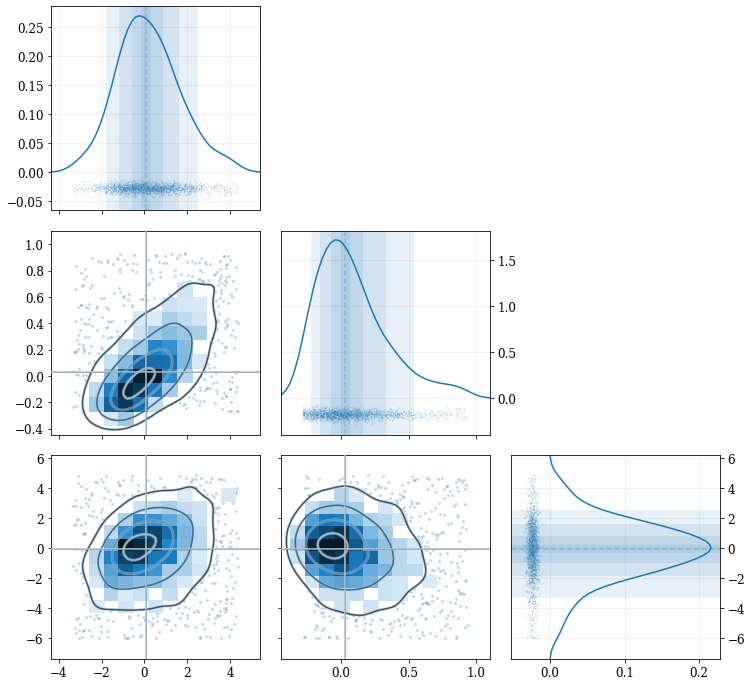

In [5]:
kale.corner(data3);

Extensive modifications are possible with passed arguments, for example:

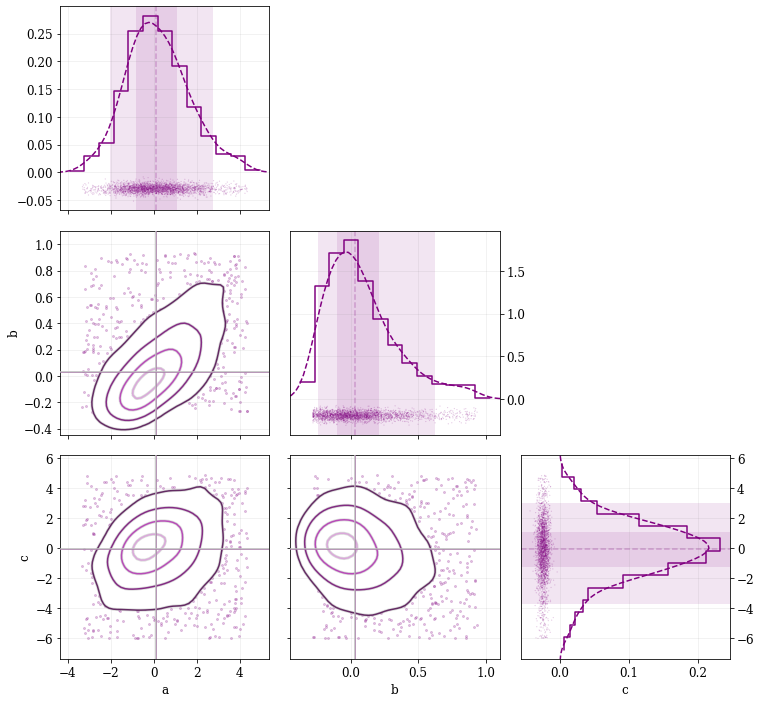

In [6]:
# 1D plot settings: turn on histograms, and modify the confidence-interval quantiles
dist1d = dict(hist=True, quantiles=[0.5, 0.9])
# 2D plot settings: turn off the histograms, and turn on scatter
dist2d = dict(hist=False, scatter=True)

kale.corner(data3, labels=['a', 'b', 'c'], color='purple',
            dist1d=dist1d, dist2d=dist2d);

The `kalepy.corner` method is a wrapper that builds a `kalepy.Corner` instance, and then plots the given data. For additional flexibility, the `kalepy.Corner` class can be used directly.  This is particularly useful for plotting multiple distributions, or using preconfigured plotting styles.

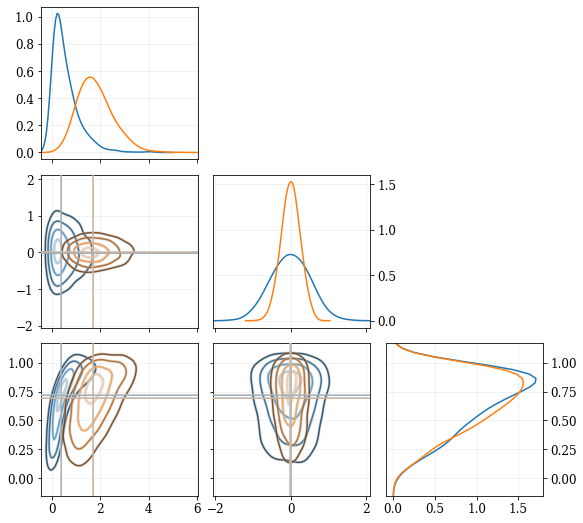

In [7]:
# Construct a `Corner` instance for 3 dimensional data, modify the figure size
corner = kale.Corner(3, figsize=[9, 9])

# Plot two different datasets using the `clean` plotting style
corner.clean(data3a)
corner.clean(data3b);

### documentation

## kalepy.dist1d and kalepy.dist2d

The `Corner` class ultimately calls the functions `dist1d` and `dist2d` to do the actual plotting of each figure panel.  These functions can also be used directly.

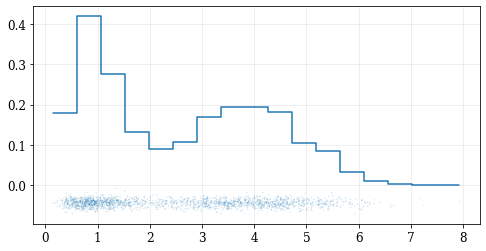

In [8]:
# Plot a 1D dataset, shape: (N,) for `N` data points
kale.dist1d(data1);

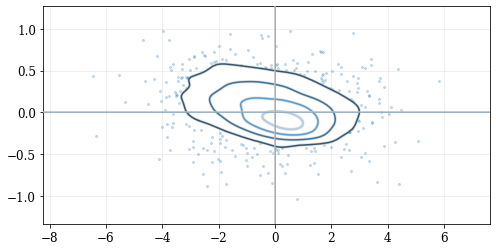

In [9]:
# Plot a 2D dataset, shape: (2, N) for `N` data points
kale.dist2d(data2, hist=False);

These functions can also be called on a `kalepy.KDE` instance, which is particularly useful for utilizing the advanced KDE functionality like reflection.

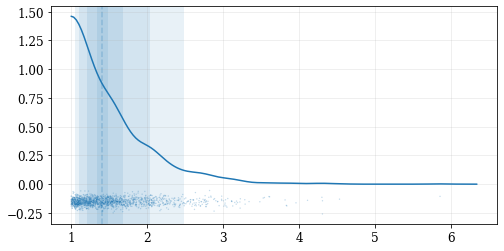

In [10]:
# Construct a random dataset, and truncate it on the left at 1.0
import numpy as np
data = np.random.lognormal(sigma=0.5, size=int(3e3))
data = data[data >= 1.0]

# Construct a KDE, and include reflection (only on the lower/left side)
kde_reflect = kale.KDE(data, reflect=[1.0, None])
# plot, and include confidence intervals
hr = kale.dist1d(kde_reflect, confidence=True);

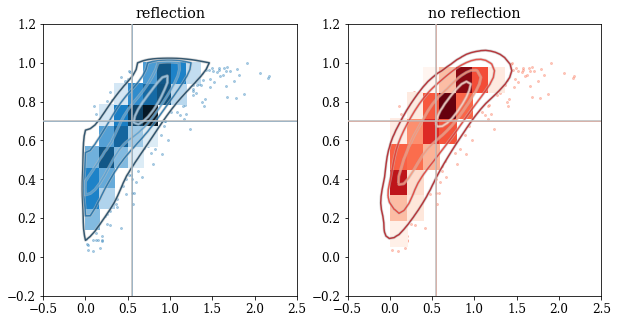

In [11]:
# Load a predefined 2D, 'random' dataset that includes boundaries on both dimensions
data = kale.utils._random_data_2d_03(num=1e3)
# Initialize figure
fig, axes = plt.subplots(figsize=[10, 5], ncols=2)

# Construct a KDE included reflection
kde = kale.KDE(data, reflect=[[0, None], [None, 1]])

# plot using KDE's included reflection parameters
kale.dist2d(kde, ax=axes[0]);

# plot data without reflection
kale.dist2d(data, ax=axes[1], cmap='Reds')

titles = ['reflection', 'no reflection']
for ax, title in zip(axes, titles):
    ax.set(xlim=[-0.5, 2.5], ylim=[-0.2, 1.2], title=title)

### documenation